In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
path_nca = r"/local/scratch/clmn1/nnunet_nca2/evaluation/nnUNet_ext/3d_fullres/Task507_Prostate_MEDSeg/Task507_Prostate_MEDSeg/nnUNetTrainerNCA__nnUNetPlansv2.1/Generic_UNet/SEQ/head_None/fold_0/Task507_Prostate_MEDSeg/val_metrics_eval.csv"
path_unet = r"/local/scratch/clmn1/nnunet_nca2/evaluation/nnUNet_ext/3d_fullres/Task507_Prostate_MEDSeg/Task507_Prostate_MEDSeg/nnUNetTrainerSequential__nnUNetPlansv2.1/Generic_UNet/SEQ/head_None/fold_0/Task507_Prostate_MEDSeg/val_metrics_eval.csv"
weight_path_nca = r"/local/scratch/clmn1/nnunet_nca2/results/nnUNet_ext/3d_fullres/Task507_Prostate_MEDSeg/Task507_Prostate_MEDSeg/nnUNetTrainerNCA__nnUNetPlansv2.1/Generic_UNet/SEQ/fold_0/model_final_checkpoint.model"
weight_path_unet = r"/local/scratch/clmn1/nnunet_nca2/results/nnUNet_ext/3d_fullres/Task507_Prostate_MEDSeg/Task507_Prostate_MEDSeg/nnUNetTrainerSequential__nnUNetPlansv2.1/Generic_UNet/SEQ/fold_0/model_final_checkpoint.model"

In [3]:
def count_parameters(model_path):
    f = torch.load(model_path)
    num_params = 0
    for key, weight in f['state_dict'].items():
        num_params += weight.numel()
    return num_params

In [4]:
res_nca = pd.read_csv(path_nca, sep='\t')
res_unet = pd.read_csv(path_unet, sep='\t')

In [5]:
res_nca['model'] = 'nnNCA'
res_unet['model'] = 'nnUNet'
res_all = pd.concat([res_nca, res_unet])

In [6]:
res_all = res_all[res_all['metric'] == 'Dice']

In [7]:
num_params_nca = count_parameters(weight_path_nca)
num_params_unet = count_parameters(weight_path_unet)

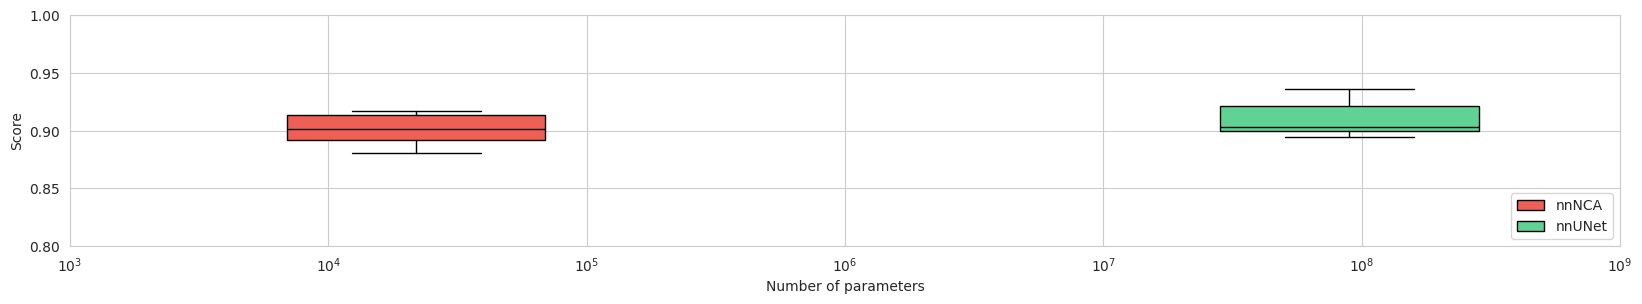

In [9]:
plt.figure(figsize=(20, 3))
sns.set_style("whitegrid")
# Example data
params = [np.log10(num_params_nca), np.log10(num_params_unet)]  # number of parameters (continuous x-axis values)
scores = [
    res_all[res_all['model'] == 'nnNCA']['value'],  # scores for model 1
    res_all[res_all['model'] == 'nnUNet']['value']  # scores for model 2
]

# Plot violin plots at given positions
bp = plt.boxplot(scores, positions=params, widths=1, patch_artist=True)  # control widths for spacing
#plt.scatter(params, [np.mean(s) for s in scores], color="red", zorder=3, label="Mean")

colors = ["#EE6055", "#60D394"]
for patch, c in zip(bp['boxes'], colors):
    patch.set_facecolor(c)

for median in bp['medians']:
    median.set_linewidth(1)
    median.set_color("black")

plt.xlabel("Number of parameters")
plt.ylabel("Score")
#plt.legend()
plt.ylim(0.8, 1)
plt.xlim(3, 9)
plt.yticks(np.arange(0.8, 1.01, 0.05))
plt.xticks(np.arange(3, 10, 1))
plt.gca().set_xticklabels([f"$10^{x}$" for x in np.arange(3, 10, 1)])
plt.legend(handles=[bp["boxes"][0], bp["boxes"][1]], labels=["nnNCA", "nnUNet"], loc="lower right")
plt.savefig("assets/model_comparison.png", dpi=300, bbox_inches='tight')